A piece of code that loads data for specific heat measurements of Silicon using Pandas. There are 2 parameters: temperature T and heat capacity Cp. We plot Cp as a function of T. We then define a function using 1D interpolation which allows us to make estimates for a Cp value for any T we might want by generalizing on the data given. 

Naive delta_T by assuming constant Cp, 216 bunches * 1.1e11 for sigma = 0.3, QMP,Smirnov,STF =  [2098.6566889529536, 1982.0646506777891, 1958.7462430227563]

Naive delta_T by assuming constant Cp, 288 bunches * 1.2e11 for sigma = 0.3, QMP,Smirnov,STF =  [3052.591547567932, 2883.003128258603, 2849.0854443967364]

Naive delta_T by assuming constant Cp,288 bunches * 1.2e11 for sigma = 0.3,0.4,0.5, Smirnov =  [2883.003128258603, 1661.9665092314297, 1085.3658835797091]

Naive delta_T by assuming constant Cp,216 bunches * 1.1e11 for sigma = 0.3,0.4,0.5, Smirnov =  [1982.0646506777891, 1142.601975096608, 746.1890449610502]

Naive delta_T by assuming constant Cp, 216 bunches * 1.1e11 for sigma = 0.3, Smirnov 2.5 GeV 1.5 GeV =  [5829.601913758204, 3497.761148254922]


Naive delta_T by assuming constant Cp, 1 bunch * 1e13 for sigma = 0.3, QMP,Smirnov,STF,NA48 =  [883.2730172360914, 834.2022940563086, 824.3881494203521, 63.79194013371772]


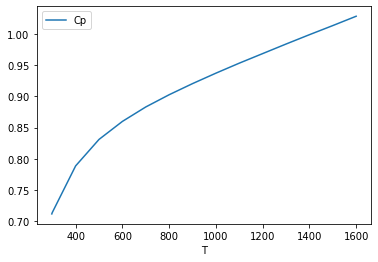

In [8]:
# In[1]:
import numpy as np
import pandas as pd
import scipy.integrate as si 
import scipy.optimize as so
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib as mpl

t0 = 300 #initial temperature

df = pd.read_csv("./Si_specific_heat.dat", skiprows=4, sep='\s+', names = ['T', 'Cp'])
df['Cp'] /= 28.0855
df.describe()

df.plot(x='T', y='Cp')

#Silicon
rho = 2.329  # g/cm3
cp  = 0.7    # J/g/K

# energy deposited
Smirnov_ED = [0.85, 0.49, 0.32]
Max_ED = [0.9, 0.85, 0.84]   #Max ED for sigma = 0.3mm [QMP, Smirnov, STF]
Wrong_smirnov  = [2.5, 1.5] # GeV/cm3

factor = 216*1.1e11*1.6e-10 #Number of bunches times particles/bunch 1.1E11 times GeV -> J.
factor2 = 288*1.2*1e11*1.6e-10
factor3 = 1e13*1.6e-10

result = [Max_ED[i] * factor for i in range(len(Max_ED))]
result5 = [Max_ED[i] * factor2 for i in range(len(Max_ED))]

result2 = [Smirnov_ED[i] * factor2 for i in range(len(Smirnov_ED))]
result4 = [Smirnov_ED[i] * factor for i in range(len(Smirnov_ED))]

result3 = [Wrong_smirnov[i] * factor for i in range(len(Wrong_smirnov))]


print("Naive delta_T by assuming constant Cp, 216 bunches * 1.1e11 for sigma = 0.3, QMP,Smirnov,STF = ", \
      [result[i] / rho / cp for i in range(len(Max_ED))])
print("\nNaive delta_T by assuming constant Cp, 288 bunches * 1.2e11 for sigma = 0.3, QMP,Smirnov,STF = ", \
      [result5[i] / rho / cp for i in range(len(Max_ED))])

print("\nNaive delta_T by assuming constant Cp,288 bunches * 1.2e11 for sigma = 0.3,0.4,0.5, Smirnov = ", \
      [result2[i] / rho / cp for i in range(len(Smirnov_ED))])
print("\nNaive delta_T by assuming constant Cp,216 bunches * 1.1e11 for sigma = 0.3,0.4,0.5, Smirnov = ", \
      [result4[i] / rho / cp for i in range(len(Smirnov_ED))])

print("\nNaive delta_T by assuming constant Cp, 216 bunches * 1.1e11 for sigma = 0.3, Smirnov 2.5 GeV 1.5 GeV = ", \
      [result3[i] / rho / cp for i in range(len(Wrong_smirnov))])


#################
EDs = [0.9, 0.85, 0.84, 0.065]   #Max ED for sigma = 0.3mm [QMP, Smirnov, STF] and 0.8x0.3mm2 FWHM

factor3 = 1.0e13*1.6e-10

New_temp = [EDs[i]*factor3 for i in range(len(EDs))]
print("\n\nNaive delta_T by assuming constant Cp, 1 bunch * 1e13 for sigma = 0.3, QMP,Smirnov,STF,NA48 = ", \
      [New_temp[i] / rho / cp for i in range(len(EDs))])

Text(0.5, 1.0, 'Normalised heat capacity of Silicon as a function of T')

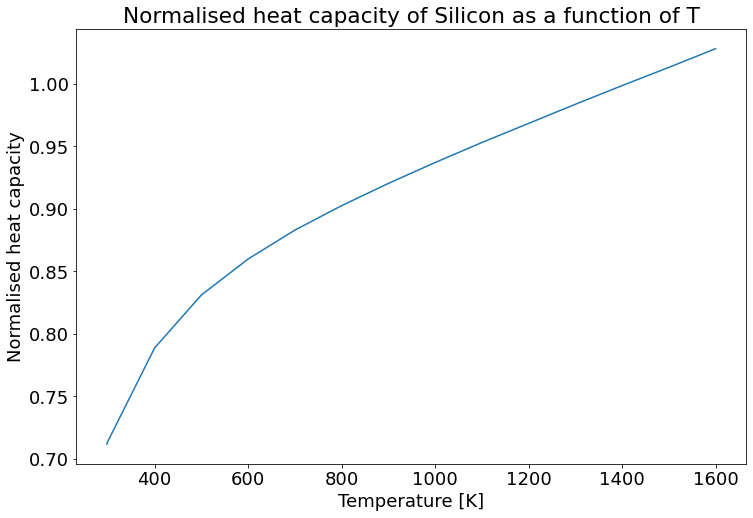

In [9]:
mpl.rcParams['font.size'] = 18

fig,ax = plt.subplots(figsize=(12,8))
ax.plot(df['T'],df['Cp'])
ax.set_xlabel('Temperature [K]')
ax.set_ylabel('Normalised heat capacity')
ax.set_title('Normalised heat capacity of Silicon as a function of T')

In [2]:
def cp(x, df):

    t  = df['T'].values
    cp = df['Cp'].values
    f2 = interp1d(t, cp, kind='cubic', fill_value="extrapolate")
    return f2(x)

#Here we integrate the cp function over the temperature range from start temperature to the max temperature from the
#simulation and subtract it from the result.
def func(x, t0, res, rho, df):
    return si.quad(cp, t0, x, args=(df))[0] * rho - res   # integral - result

#Here we calculate the actual delta_T
t1  = [so.fsolve(func, t0, args=(t0, result[i], rho, df))for i in range(len(Max_ED))]  # equated func to 0
print("delta_T corrected for Cp 216 bunches * 1.1e11 for sigma = 0.3, QMP,Smirnov,STF =",[t1[i] - t0 for i in range(len(Max_ED))])
t5  = [so.fsolve(func, t0, args=(t0, result5[i], rho, df))for i in range(len(Max_ED))]  # equated func to 0
print("\ndelta_T corrected for Cp 288 bunches * 1.2e11 for sigma = 0.3, QMP,Smirnov,STF =",[t5[i] - t0 for i in range(len(Max_ED))])


t2  = [so.fsolve(func, t0, args=(t0, result2[i], rho, df))for i in range(len(Smirnov_ED))]  # equated func to 0
print("\ndelta_T corrected for variance in Cp 288 bunches Smirnov [0.3,0.4,0.5]",[t2[i] - t0 for i in range(len(Smirnov_ED))])
t4  = [so.fsolve(func, t0, args=(t0, result4[i], rho, df))for i in range(len(Smirnov_ED))]  # equated func to 0
print("\ndelta_T corrected for variance in Cp 216 bunches Smirnov [0.3,0.4,0.5]",[t4[i] - t0 for i in range(len(Smirnov_ED))])

t3  = [so.fsolve(func, t0, args=(t0, result3[i], rho, df))for i in range(len(Wrong_smirnov))]  # equated func to 0
print("\ndelta_T corrected for variance in Cp due to T increase",[t3[i] - t0 for i in range(len(Wrong_smirnov))])

t_new  = [so.fsolve(func, t0, args=(t0, New_temp[i], rho, df))for i in range(len(EDs))] 
print("\n\ndelta_T corrected for variance in Cp due to T increase, QMP,STF,Smirnov,NA48",\
      [t_new[i] - t0 for i in range(len(EDs))])

delta_T corrected for Cp 216 bunches * 1.1e11 for sigma = 0.3, QMP,Smirnov,STF = [array([1563.80512195]), array([1487.37640685]), array([1471.95949928])]

delta_T corrected for Cp 288 bunches * 1.2e11 for sigma = 0.3, QMP,Smirnov,STF = [array([2137.77929461]), array([2043.44922872]), array([2024.14834402])]

delta_T corrected for variance in Cp 288 bunches Smirnov [0.3,0.4,0.5] [array([2043.44922872]), array([1272.21786117]), array([866.13752718])]

delta_T corrected for variance in Cp 216 bunches Smirnov [0.3,0.4,0.5] [array([1487.37640685]), array([907.5927818]), array([614.49416657])]

delta_T corrected for variance in Cp due to T increase [array([3221.95074032]), array([2367.75651254])]


delta_T corrected for variance in Cp due to T increase, QMP,STF,Smirnov,NA48 [array([717.50889539]), array([680.84990559]), array([673.48970927]), array([60.22837556])]


First we take the max value of energy deposition from the simulation for different sigma and translate directly into Temperature increase. This is naive as we assume a constant heat capacity Cp.\
But we have data on the heat capacity as a function of temperature and when plotted we see that the heat capacity increases with higher temperature, so the temperature increase is lower for higher temperature.

We correct for this varying heat capacity by integrating the function for Cp (where the function is an interpolation of the Cp versus T data)over the temperature range from initial temperature t0 to the maximal Temperature from the simulation(Which comes from converting the maximal value of energydeposition to a temperature assuming Cp = 0.7).

This correction might be overcorrelating, due to assuming Tmax for Cp = 0.7.

But we still neglect diffusion because of assumption of adiabatic temperature increase. This can be argued as a valid assumption because of the timescales of the pulses about microseconds. 